In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [17]:

train_data =pd.read_csv('train.csv')
test_data =pd.read_csv('test.csv')
#print(train_data.head())
for column in train_data.columns:
    if train_data[column].dtype == 'object':
        train_data[column].fillna(train_data[column].mode()[0],inplace=True)
        if column in test_data.columns:
            test_data[column].fillna(test_data[column].mode()[0],inplace=True)
    else:
        train_data[column].fillna(train_data[column].mean(),inplace=True)
        if column in test_data.columns:
            test_data[column].fillna(test_data[column].mean(),inplace=True)        

In [18]:
features = ['GrLivArea','BedroomAbvGr','FullBath','HalfBath']
X=train_data[features]
y=train_data['SalePrice']
X_train, X_val,y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=41)
model=LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [19]:
y_pred = model.predict(X_val)
MAE = mean_absolute_error(y_val,y_pred)
MSE = mean_squared_error(y_val,y_pred)
r2 = r2_score(y_val,y_pred)

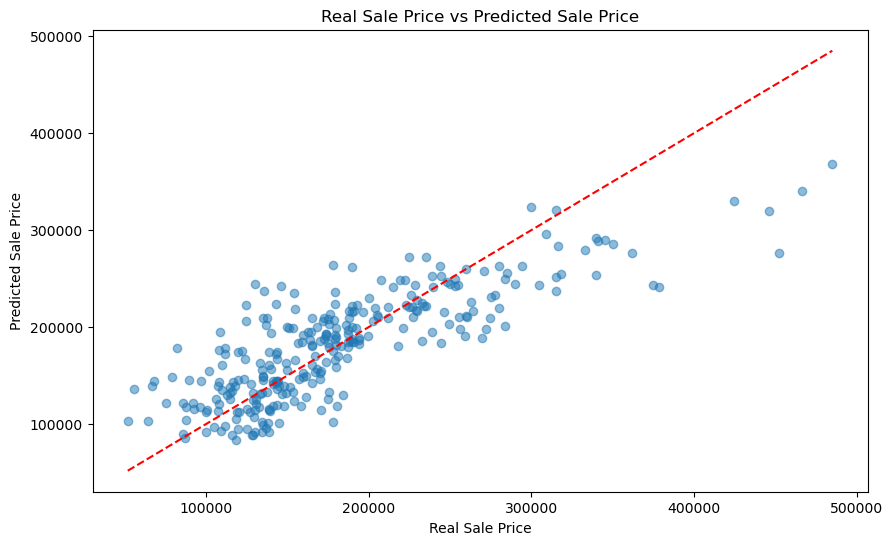

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

plt.scatter(y_val, y_pred, alpha=0.5)
plt.title('Real Sale Price vs Predicted Sale Price')
plt.xlabel('Real Sale Price')
plt.ylabel('Predicted Sale Price')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
plt.show()


In [34]:
#example
data = {
    'GrLivArea': [2000, 1500, 2500],
    'BedroomAbvGr': [3, 2, 4],
    'FullBath': [2, 1, 2],
    'HalfBath': [1, 1, 1]
}
examples=pd.DataFrame(data)
exp_pred = model.predict(examples)
print(exp_pred)

[245120.65074448 189261.57879026 268681.93125396]
